# Notebook 2: Temporal Analysis and Data Preparation

## Introduction
This notebook aims to explore the temporal aspects of the global superstore sales dataset, identifying patterns, trends, and seasonality in the data. The insights gained here will serve as the foundation for building a short-term sales forecasting model, which will be addressed in the next notebook.

## Specific Objectives
- Explore and understand the seasonality and trends in sales over time.
- Analyze temporal variables that may impact sales behavior.
- Test the stationarity of the time series data.
- Prepare the dataset at a daily granularity for future modeling purposes.

In [1]:
import pandas as pd
from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', decimal=',')

In [3]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

In [4]:
df['Postal Code'] = df['Postal Code'].astype(str)

In [5]:
df.loc[(df['City'] == 'Burlington') & (df['State'] == 'Vermont') & (df['Postal Code'].isnull()), 'Postal Code'] = '05401'

In [6]:
df['Postal Code'] = df['Postal Code'].apply(lambda x: x[:-2] if x.endswith('.0') else x)

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

df['Order Date'] = df['Order Date'].values.astype('datetime64[D]')
df['Ship Date'] = df['Ship Date'].values.astype('datetime64[D]')

In [8]:
df['Ship Mode'] = df['Ship Mode'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Country'] = df['Country'].astype('category')
df['State'] = df['State'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Sub-Category'] = df['Sub-Category'].astype('category')

In [9]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day of Week'] = df['Order Date'].dt.day_name()
df['Week'] = df['Order Date'].dt.isocalendar().week

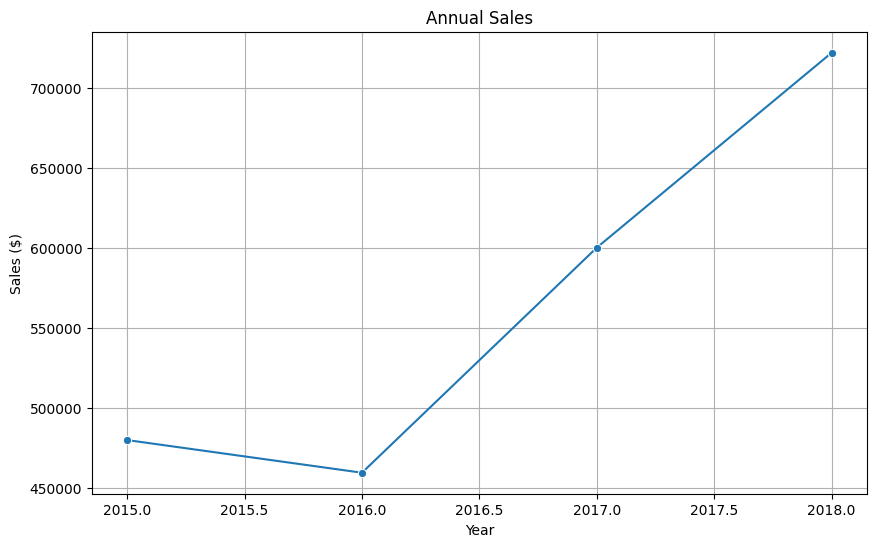

In [15]:
# Annual Sales
annual_sales = df.groupby('Order Year')['Sales'].sum()

# Annual Sales Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_sales.index, y=annual_sales.values, marker='o')
plt.title('Annual Sales')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.grid()
plt.show()

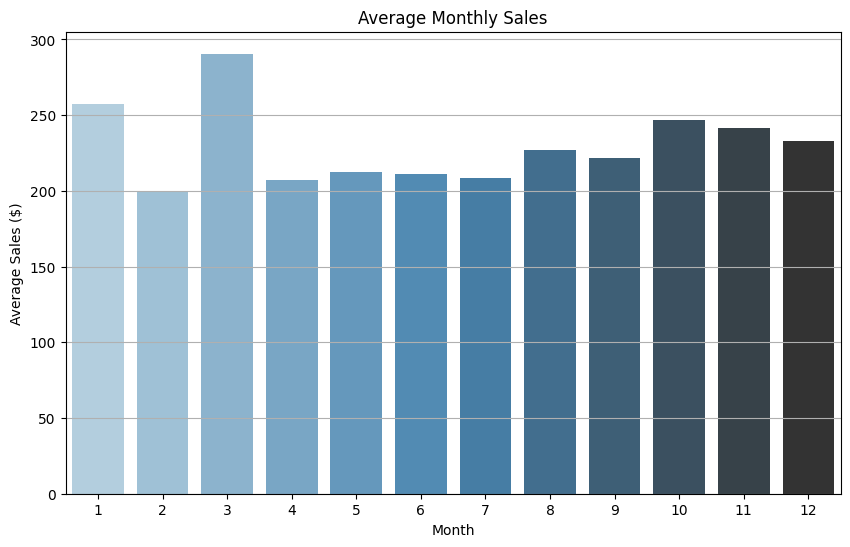

In [16]:
# Average Sales per Month
monthly_sales = df.groupby('Order Month')['Sales'].mean()

# Monthly Sales Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=monthly_sales.index, 
    y=monthly_sales.values, 
    palette='Blues_d', 
    hue=monthly_sales.index,  # Uses the index as `hue`
    legend=False  # Disables the legend
)
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales ($)')
plt.grid(axis='y')
plt.show()

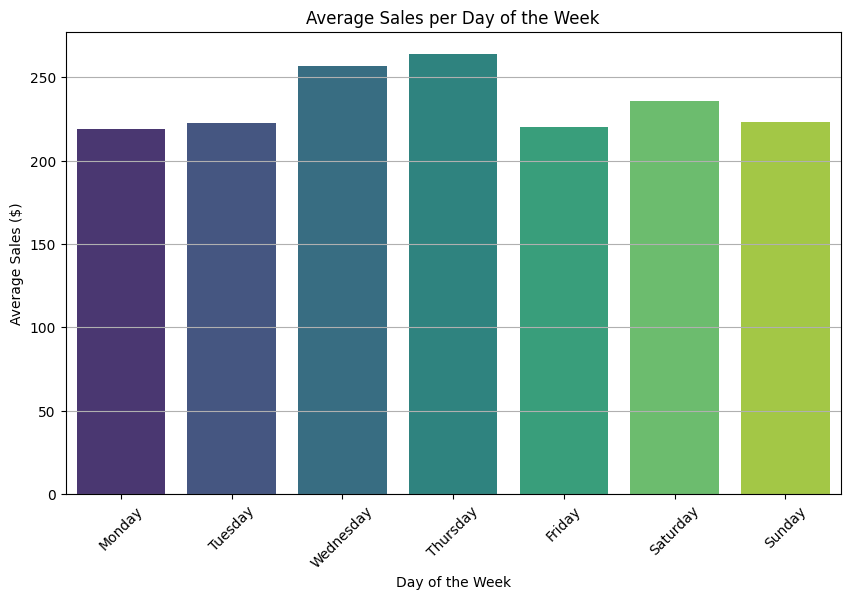

In [17]:
# Average Sales per Day of the Week
weekly_sales = df.groupby('Order Day of Week')['Sales'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(weekday_order)

# Weekly Sales Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis', hue=weekly_sales.index, legend=False)
plt.title('Average Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales ($)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test (ADF)
result = adfuller(df.groupby('Order Date')['Sales'].sum())
print('ADF Test Statistic:', result[0])
print('p-Value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing will be required.")

ADF Test Statistic: -5.761112092918508
p-Value: 5.669526815779155e-07
Critical Values: {'1%': -3.435743555099632, '5%': -2.8639217381867486, '10%': -2.568038075665972}
The series is stationary.


In [19]:
# Group sales by day
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Display the first few rows
daily_sales.head()


,Order Date,Sales
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


### Conclusion

In this second notebook, we took significant steps toward building a robust predictive sales model. The following key achievements summarize the work done:

1. **Seasonality and Trends**:
   - We identified strong seasonal patterns, with clear peaks in sales during the holiday season.
   - Weekly trends showed that weekends often experience higher average sales, potentially due to increased consumer activity.

2. **Temporal Analysis**:
   - Aggregating and analyzing sales data across years, months, and weekdays highlighted critical time periods for business performance.
   - The temporal insights gained here will inform the features used in the predictive modeling phase.

3. **Stationarity Testing**:
   - Through the Augmented Dickey-Fuller (ADF) test, we confirmed that the sales data is stationary. This is a crucial prerequisite for time series modeling, simplifying our approach for the forecasting task.

4. **Data Preparation for Modeling**:
   - The dataset was transformed and structured to be directly utilized in machine learning and forecasting models in the next phase.
   - Features derived from date columns, such as year, month, and day of the week, were created to enhance the model's predictive power.

This analysis has set a strong foundation for the next step: developing and evaluating a machine learning model to forecast sales for the upcoming 7 days. The insights from this notebook will guide our feature engineering and model selection process, ensuring that the model captures the temporal dynamics and seasonal behaviors identified.

---

With the groundwork laid, we are now ready to dive into predictive modeling in the next notebook.